#<center>Lab 2
#<center>22122109
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Aim : Get any PDF file of minimum 2000 words and extract the text from it.  Separate the tokens and remove the symbols, numbers and stop words from the text. Find the frequency of each word and display it with the graphical representation.

## Reading 2000 words from pdf

In [20]:
from PyPDF2 import PdfReader
reader = PdfReader('nlp_lab2.pdf')
print(len(reader.pages))
page = reader.pages[0]
text = page.extract_text()
print(text)

3
Abstract —The recent growth of the Internet of Things (IoT) has resulted in a rise in IoT based DDoS 
attacks. This paper presents a solution to the detection of botnet activity within consumer IoT devices 
and networks. A novel application of Deep Learning i s used to develop a detection model based on a 
Bidirectional Long Short Term Memory based Recurrent Neural Network (BLSTM -RNN). Word 
Embedding is used for text recognition and conversion of attack packets into tokenised integer format. 
The developed BLSTM -RNN detection model is compared to a LSTM -RNN for detecting four attack 
vectors used by the mirai botnet, and evaluated for accuracy and loss. The paper demonstrates that 
although the bidirectional approach adds overhead to each epoch and increases process ing time, it 
proves to be a better progressive model over time. A labelled dataset was generated as part of this 
research, and is available upon request. Index Terms —Deep Learning, LSTM, Word Embedding, IoT , 
Botn

## Installing Libraries

In [19]:
from tabulate import tabulate

In [21]:
!pip install spacy
import spacy

## Define a list of stop words

In [9]:
# Load the spaCy English language model
nlp = spacy.load('en_core_web_sm')

# Define a list of stop words
stop_words = set(spacy.lang.en.stop_words.STOP_WORDS)

In [26]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt
nlp = spacy.load('en_core_web_sm')




## Find the frequency of each word and display it with the graphical representation.


In [27]:
doc = nlp(text)


token_info = []

word_frequencies = Counter()

for token in doc:
    if token.is_alpha and token.text.lower() not in nlp.Defaults.stop_words:
        token_info.append([token.text, token.pos_, token.dep_, token.lemma_, token.ent_type_])
        word_frequencies[token.lemma_] += 1


for ent in doc.ents:
    token_info.append([ent.text, ent.label_, "", "", ""])

print("Word frequencies:", word_frequencies)

Word frequencies: Counter({'iot': 15, 'attack': 14, 'device': 14, 'detection': 12, 'base': 8, 'consumer': 8, 'botnet': 7, 'DDoS': 5, 'network': 5, 'model': 5, 'internet': 4, 'present': 4, 'BLSTM': 4, 'IoT': 3, 'paper': 3, 'activity': 3, 'Deep': 3, 'develop': 3, 'Word': 3, 'text': 3, 'recognition': 3, 'LSTM': 3, 'increase': 3, 'time': 3, 'prove': 3, 'expect': 3, 'connect': 3, 'security': 3, 'insecure': 3, 'leverage': 3, 'perform': 3, 'continue': 3, 'lack': 3, 'awareness': 3, 'infection': 3, 'method': 3, 'recent': 2, 'Things': 2, 'result': 2, 'solution': 2, 'novel': 2, 'Learning': 2, 's': 2, 'Bidirectional': 2, 'Long': 2, 'Short': 2, 'Term': 2, 'Memory': 2, 'Neural': 2, 'Network': 2, 'embed': 2, 'conversion': 2, 'packet': 2, 'compare': 2, 'vector': 2, 'evaluate': 2, 'accuracy': 2, 'process': 2, 'research': 2, 't': 2, 'aim': 2, 'previously': 2, 'create': 2, 'ease': 2, 'manufacturer': 2, 'feature': 2, 'IP': 2, 'camera': 2, 'vulnerability': 2, 'protocol': 2, 'attacker': 2, 'resource': 2, 'n

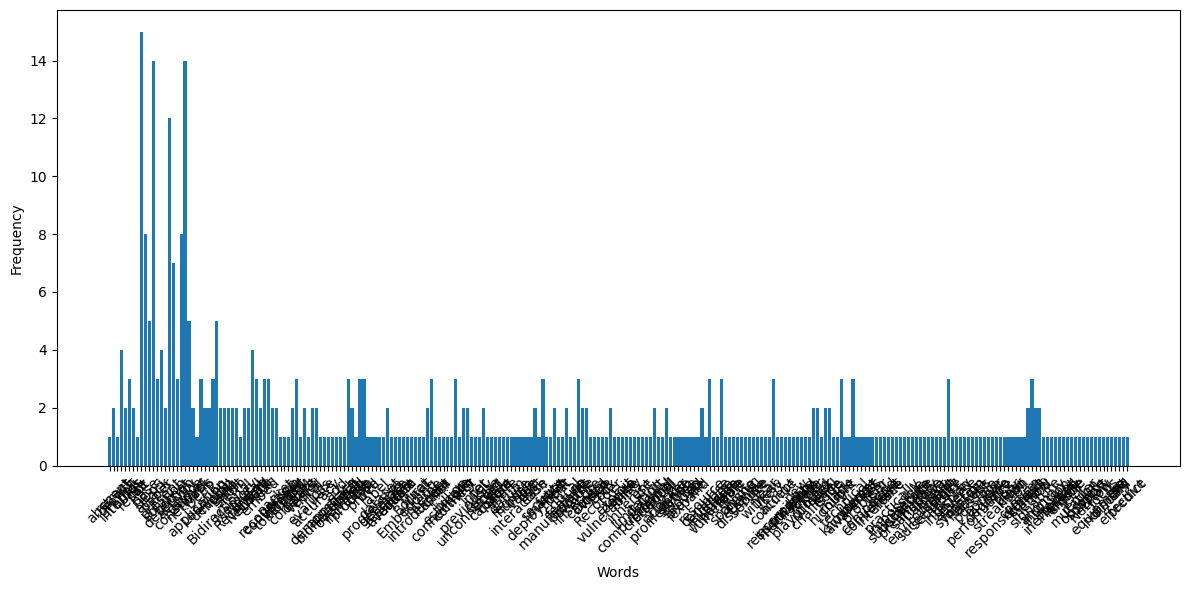

In [28]:
words = list(word_frequencies.keys())
counts = list(word_frequencies.values())

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Create the bar chart
plt.bar(range(len(word_frequencies)), counts, tick_label=words)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.gcf().subplots_adjust(bottom=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Create graph frequency of top 20 words

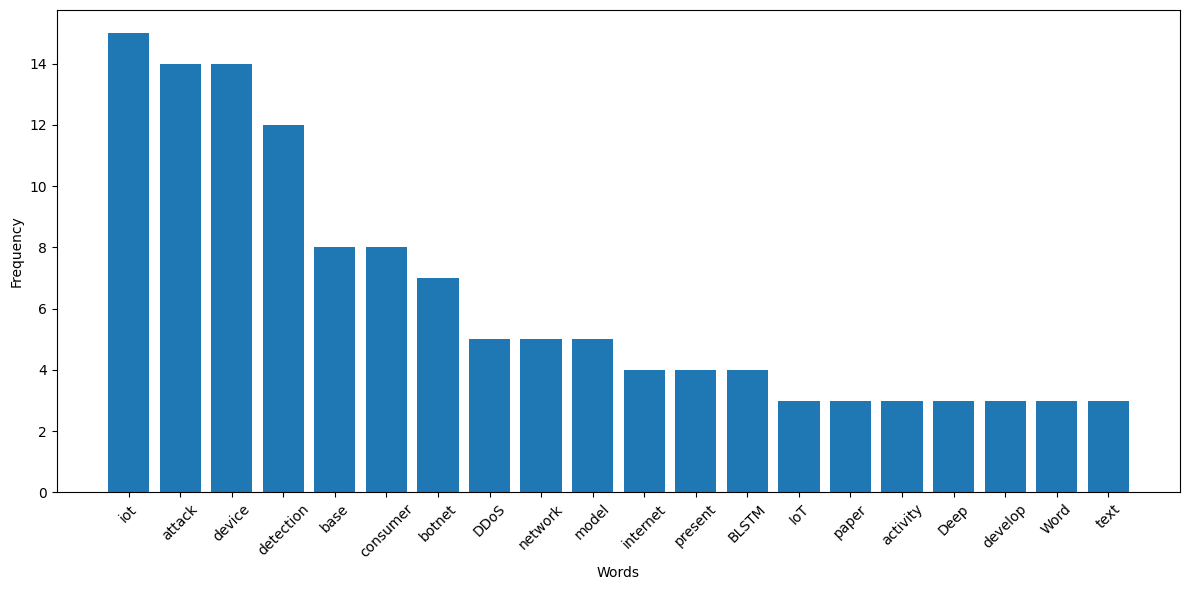

In [29]:
# Get the top 20 most frequent words
top_words = dict(sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:20])

# Create a bar chart for the top 20 word frequencies
words = list(top_words.keys())
counts = list(top_words.values())

plt.figure(figsize=(12, 6))
plt.bar(range(len(top_words)), counts, tick_label=words)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
# Define headers for the table
headers = ["Text", "POS", "Dependency", "Lemma", "Entity Type"]

# Print the table using tabulate
print(tabulate(token_info, headers=headers, tablefmt="grid"))

+-------------------------------+----------+--------------+----------------+---------------+
| Text                          | POS      | Dependency   | Lemma          | Entity Type   |
+===============================+==========+==============+================+===============+
| Abstract                      | ADJ      | advmod       | abstract       |               |
+-------------------------------+----------+--------------+----------------+---------------+
| recent                        | ADJ      | amod         | recent         |               |
+-------------------------------+----------+--------------+----------------+---------------+
| growth                        | NOUN     | nsubj        | growth         |               |
+-------------------------------+----------+--------------+----------------+---------------+
| Internet                      | NOUN     | pobj         | internet       |               |
+-------------------------------+----------+--------------+-----------